In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/kaggle/input/ibm-carbonsense-yearlongghgemission/yearly_full_release_long_format.csv"
df = pd.read_csv(file_path)

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN
4,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,0.19,NaN,NaN


In [41]:

# Filter data for the United States and North America
df_america = df[df["Area"].isin(["United States of America", "North America"])]

# Save the preprocessed dataset
df_america.to_csv("preprocessed_carbon_data_america.csv", index=False)

In [42]:
df_america.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
235332,North America,NaN,2000,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capacity,Aggregate fuel,Clean,GW,269.49,NaN,NaN
235333,North America,NaN,2000,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capacity,Aggregate fuel,Fossil,GW,608.68,NaN,NaN
235334,North America,NaN,2000,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capacity,Aggregate fuel,Gas and Other Fossil,GW,255.88,NaN,NaN
235335,North America,NaN,2000,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,157.94,NaN,NaN
235336,North America,NaN,2000,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Capacity,Aggregate fuel,Renewables,GW,161.01,NaN,NaN


In [43]:
# Display basic statistics
print("Basic Statistics:")
print(df_america.describe())

# Missing values analysis
print("Missing Values:")
print(df_america.isnull().sum())

Basic Statistics:
              Year      EU    OECD     G20      G7   ASEAN        Value  \
count  3168.000000  1584.0  1584.0  1584.0  1584.0  1584.0  3144.000000   
mean   2011.500000     0.0     1.0     1.0     1.0     0.0   480.113585   
std       6.923279     0.0     0.0     0.0     0.0     0.0   927.204782   
min    2000.000000     0.0     1.0     1.0     1.0     0.0     0.010000   
25%    2005.750000     0.0     1.0     1.0     1.0     0.0    12.197500   
50%    2011.500000     0.0     1.0     1.0     1.0     0.0    47.260000   
75%    2017.250000     0.0     1.0     1.0     1.0     0.0   513.545000   
max    2023.000000     0.0     1.0     1.0     1.0     0.0  4946.380000   

       YoY absolute change  YoY % change  
count          2323.000000   2323.000000  
mean              4.039014      5.320693  
std              45.286584     16.785002  
min            -245.980000    -69.400000  
25%              -0.435000     -0.955000  
50%               0.470000      1.390000  
75%  

In [44]:


# Drop irrelevant columns
columns_to_drop = ["Country code", "EU", "OECD", "G20", "G7", "ASEAN"]
df_cleaned = df_america.drop(columns=columns_to_drop, errors='ignore')

# Drop rows where 'Value' is missing (since it's a key metric)
df_cleaned = df_cleaned.dropna(subset=["Value"])

# Fill missing categorical values with 'Unknown'
df_cleaned.fillna("Unknown", inplace=True)

# Convert to a narrative format for LLM input
df_cleaned["LLM_Input"] = df_cleaned.apply(
    lambda row: f"In {row['Year']}, {row['Area']} {row['Area type']} had a {row['Category'].lower()} of {row['Value']} {row['Unit']} in the {row['Subcategory'].lower()} sector ({row['Variable']}).",
    axis=1
)

# Display basic statistics
print("Basic Statistics:")
print(df_cleaned.describe())

# Missing values analysis
print("Missing Values:")
print(df_cleaned.isnull().sum())




<ipython-input-44-0502662fea58>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.fillna("Unknown", inplace=True)


Basic Statistics:
              Year        Value
count  3144.000000  3144.000000
mean   2011.500000   480.113585
std       6.923288   927.204782
min    2000.000000     0.010000
25%    2005.750000    12.197500
50%    2011.500000    47.260000
75%    2017.250000   513.545000
max    2023.000000  4946.380000
Missing Values:
Area                   0
Year                   0
Area type              0
Continent              0
Ember region           0
Category               0
Subcategory            0
Variable               0
Unit                   0
Value                  0
YoY absolute change    0
YoY % change           0
LLM_Input              0
dtype: int64


In [45]:
df_cleaned.head()

,Area,Year,Area type,Continent,Ember region,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,LLM_Input
235332,North America,2000,Region,Unknown,Unknown,Capacity,Aggregate fuel,Clean,GW,269.49,Unknown,Unknown,"In 2000, North America Region had a capacity o..."
235333,North America,2000,Region,Unknown,Unknown,Capacity,Aggregate fuel,Fossil,GW,608.68,Unknown,Unknown,"In 2000, North America Region had a capacity o..."
235334,North America,2000,Region,Unknown,Unknown,Capacity,Aggregate fuel,Gas and Other Fossil,GW,255.88,Unknown,Unknown,"In 2000, North America Region had a capacity o..."
235335,North America,2000,Region,Unknown,Unknown,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,157.94,Unknown,Unknown,"In 2000, North America Region had a capacity o..."
235336,North America,2000,Region,Unknown,Unknown,Capacity,Aggregate fuel,Renewables,GW,161.01,Unknown,Unknown,"In 2000, North America Region had a capacity o..."


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


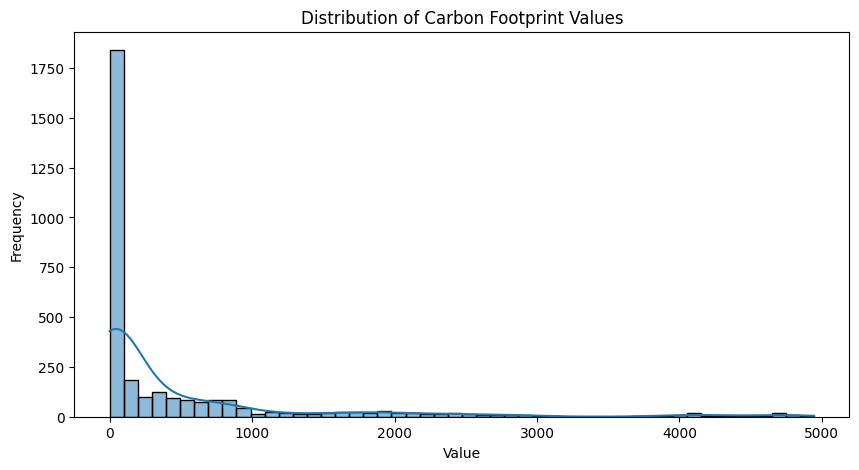

<ipython-input-46-0f0b391827ef>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x="Year", y="Value", estimator="mean", ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


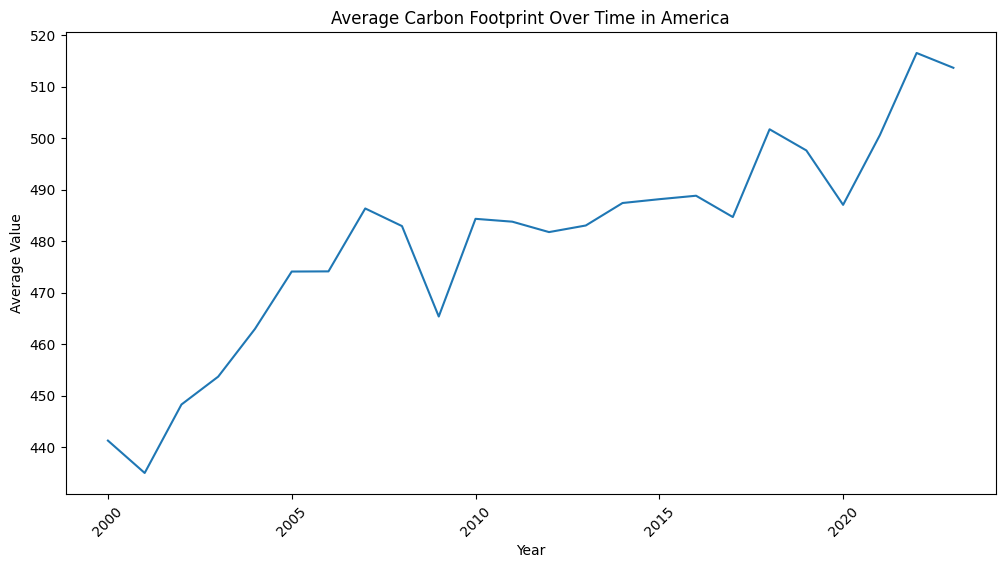

In [46]:
# Distribution of carbon footprint values
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Value"], bins=50, kde=True)
plt.title("Distribution of Carbon Footprint Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x="Year", y="Value", estimator="mean", ci=None)
plt.title("Average Carbon Footprint Over Time in America")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

In [52]:
# Select only the LLM_Input column
df_america_llm = df_cleaned[["LLM_Input"]]

# Save to CSV
df_america_llm.to_csv("preprocessed_carbon_data_america_llm.csv", index=False)

In [53]:
df_america_llm

,LLM_Input
235332,"In 2000, North America Region had a capacity o..."
235333,"In 2000, North America Region had a capacity o..."
235334,"In 2000, North America Region had a capacity o..."
235335,"In 2000, North America Region had a capacity o..."
235336,"In 2000, North America Region had a capacity o..."
...,...
335089,"In 2023, United States of America Country had ..."
335090,"In 2023, United States of America Country had ..."
335091,"In 2023, United States of America Country had ..."
335092,"In 2023, United States of America Country had ..."
